<a href="https://colab.research.google.com/github/jdberkson/OPTI-556-Computational-Imaging/blob/main/Homework3_JoelB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 OPTI 556 Computational Imaging

###Part 1

For this part 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import cv2
from keras.datasets import mnist

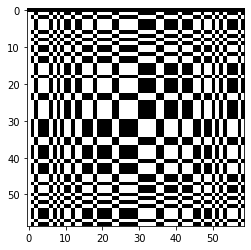

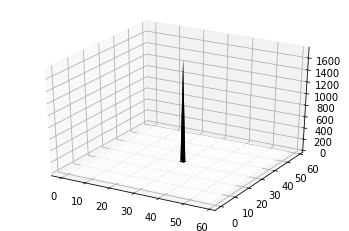

In [ ]:
def qres(p):
  #function to find the quadratic residues modulo prime number p between 1
  # and p-1. The function returns a list with value 1 for all indices which
  # are quadratic residues modulo p and value 0 for indices which are not
  # quadratic residues.
  #
  qr=np.zeros(p)
  for i in range(1,p):
    qr[np.mod(i**2,p)-1]=1
  return qr
p=59
qr=qres(p)
t=np.zeros((p,p));
t[1:p,0]=1;
for i in range(1,p):
    for j in range(1,p):
        if qr[i-1]==qr[j-1]:
            t[i,j]=1;
tt=np.vstack((np.hstack((t,t)),np.hstack((t,t))))
ht=2*(t-0.5)
ht[0,0]=1;
cp=signal.convolve2d(ht,t, mode='same',boundary='wrap');
#plt.subplot(1,2,1);
plt.imshow(t,cmap='gray');

fig=plt.figure()

ax = plt.gca(projection='3d')

X, Y = np.meshgrid(range(np.shape(cp)[1]), range(np.shape(cp)[0]))


surf = ax.plot_surface(X, Y, cp, rstride=1, cstride=1, antialiased=True, cmap='binary')


I started witht he same hand written digits data set just to make sure things were working:

(-0.5, 58.5, 58.5, -0.5)

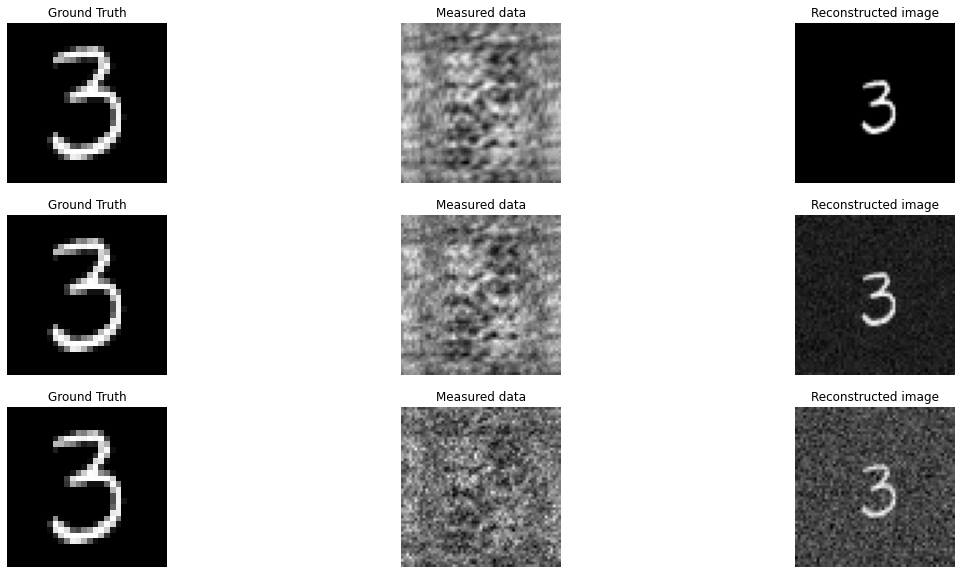

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[50];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');

plt.subplot(3,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[50];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=1000
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,7);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,8);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,9);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')


I figured a good test for this would be a step function.

(-0.5, 58.5, 58.5, -0.5)

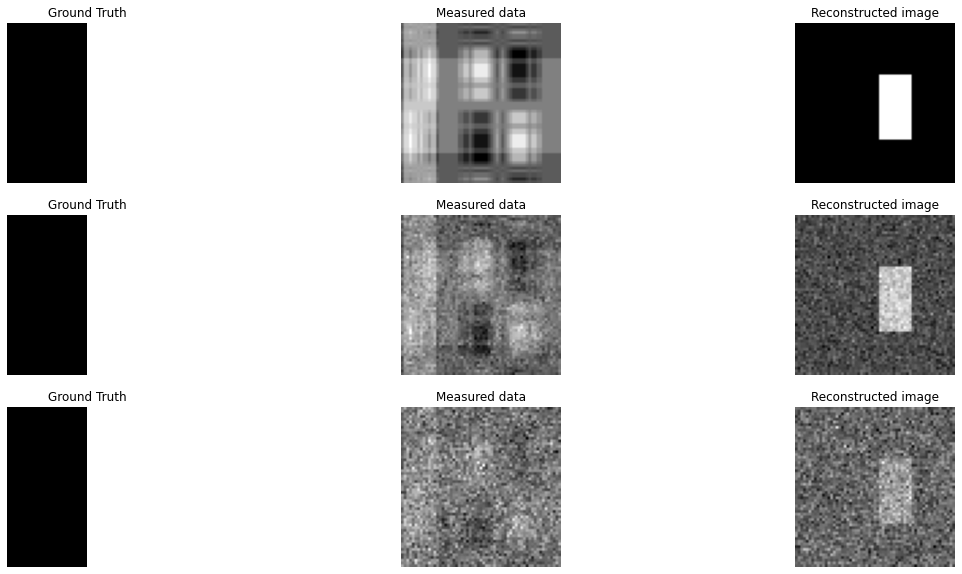

In [ ]:
X = np.linspace(0,1,24)
Y = X
X, Y = np.meshgrid(X,Y)
def step(X):

  if(X<.5):
    Z = 0
  else:
    Z = 1
  return Z
stp = np.vectorize(step)
stepfun = stp(X)
imagey = stepfun
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');

plt.subplot(3,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=1000
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,7);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,8);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,9);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

I work with a lot of fringe pattern analysis, so I thought I try a sine wave

(-0.5, 58.5, 58.5, -0.5)

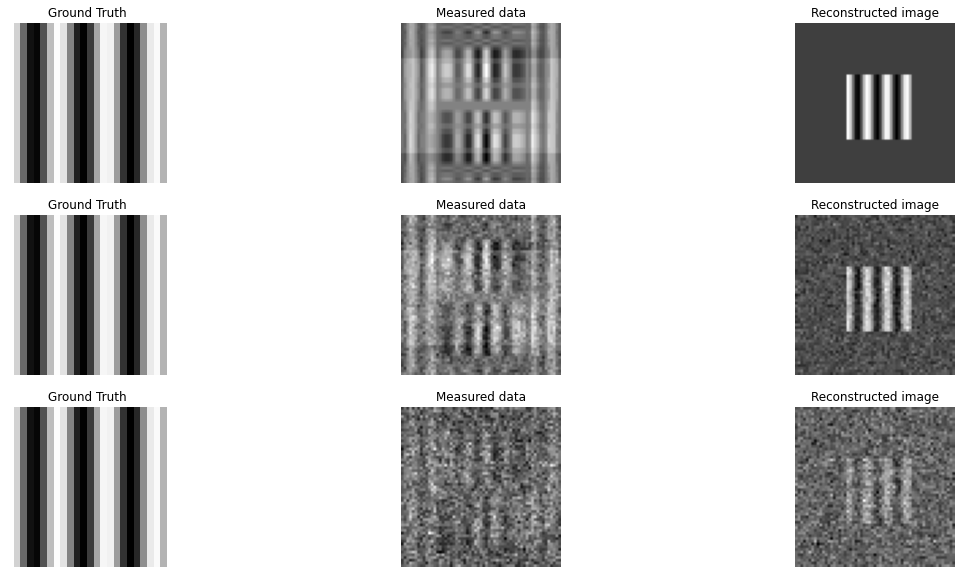

In [ ]:
X = np.linspace(0,1,24)
Y = X
X, Y = np.meshgrid(X,Y)

Fringe = np.cos(X*20)+.5
imagey = Fringe
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');

plt.subplot(3,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=1000
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,7);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,8);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,9);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

As expected, noise pretty much destroys the accuracy for linear reconstruction. Need to have lots of photons to get good reconstrcution, which is hard if you have a coded aperture without a lens...

###Part 2

For this part, it was just taking way too long for me to parse all of the hand written digit images, so I reduced it to 5000 training and testing images.

In [ ]:
# load the mnist dataset of characters
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0
x_train = x_train[0:5000]
y_train = y_train[0:5000]
x_test = x_test[0:5000]
y_test = y_test[0:5000]


g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))
for pop in range(np.shape(x_test)[0]):
  g_test[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_test[pop,:,:], mode='same',boundary='wrap'))\
                                               ,mode='same',boundary='wrap'),dsize=(28,28))
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  g_train[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_train[pop,:,:], mode='same',boundary='wrap'))\
                                                ,mode='same',boundary='wrap'),dsize=(28,28))
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
g_train = np.reshape(g_train, (len(g_train), 28, 28, 1))
g_test = np.reshape(g_test, (len(g_test), 28, 28, 1))

First I used the same network as in your example:

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder1 = keras.Model(input_img, decoded)
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 14, 14, 32)        0   

Because I didn't have as much training data, i decreased the batch size and increased the # of epochs to get to at least a reasonable loss.

In [ ]:
autoencoder1.fit(
    x=g_train,
    y=x_train,
    epochs=20,
    batch_size=16,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/20
313/313 [==============================] - 18s 56ms/step - loss: 0.2516 - val_loss: 0.1706
Epoch 2/20
313/313 [==============================] - 18s 56ms/step - loss: 0.1567 - val_loss: 0.1434
Epoch 3/20
313/313 [==============================] - 18s 56ms/step - loss: 0.1368 - val_loss: 0.1320
Epoch 4/20
313/313 [==============================] - 17s 56ms/step - loss: 0.1270 - val_loss: 0.1249
Epoch 5/20
313/313 [==============================] - 17s 56ms/step - loss: 0.1208 - val_loss: 0.1195
Epoch 6/20
313/313 [==============================] - 17s 55ms/step - loss: 0.1165 - val_loss: 0.1163
Epoch 7/20
313/313 [==============================] - 18s 56ms/step - loss: 0.1131 - val_loss: 0.1151
Epoch 8/20
313/313 [==============================] - 17s 56ms/step - loss: 0.1104 - val_loss: 0.1120
Epoch 9/20
313/313 [==============================] - 17s 55ms/step - loss: 0.1077 - val_loss: 0.1090
Epoch 10/20
313/313 [==============================] - 17s 55ms/step - loss: 0.106

In [ ]:
autoencoder1.save("autoencoder1")
!tar -czvf autoencoder1.tar.gz autoencoder1/
files.download('autoencoder1.tar.gz')


INFO:tensorflow:Assets written to: autoencoder1/assets
autoencoder1/
autoencoder1/variables/
autoencoder1/variables/variables.index
autoencoder1/variables/variables.data-00000-of-00001
autoencoder1/keras_metadata.pb
autoencoder1/saved_model.pb
autoencoder1/assets/


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

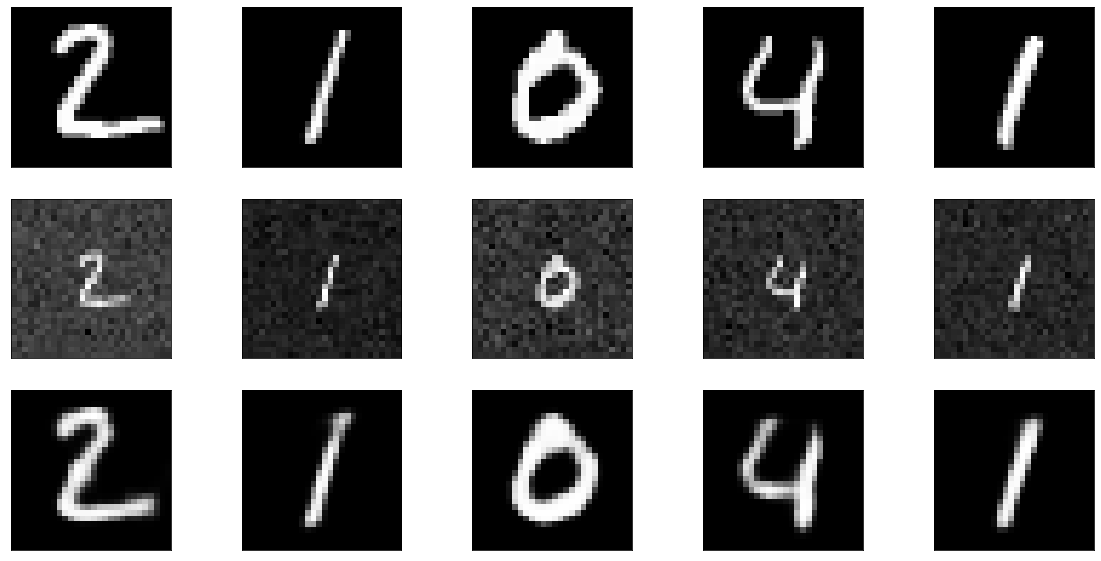

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder1.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

It's not perfect, but looks like it gets the gist of it.

For this next one, I simply added more filters to the 1st convolution layer, and changed the initial and final kernel size to be 5x5 instead of 3x3

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (5, 5), activation='sigmoid', padding='same')(x)

autoencoder2 = keras.Model(input_img, decoded)
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder2.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_14 (UpSampling (None, 14, 14, 32)        0   

In [ ]:
autoencoder2.fit(
    x=g_train,
    y=x_train,
    epochs=20,
    batch_size=32,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/20
157/157 [==============================] - 31s 199ms/step - loss: 0.1512 - val_loss: 0.1447
Epoch 2/20
157/157 [==============================] - 31s 200ms/step - loss: 0.1379 - val_loss: 0.1316
Epoch 3/20
157/157 [==============================] - 32s 203ms/step - loss: 0.1291 - val_loss: 0.1250
Epoch 4/20
157/157 [==============================] - 32s 206ms/step - loss: 0.1231 - val_loss: 0.1203
Epoch 5/20
157/157 [==============================] - 32s 207ms/step - loss: 0.1184 - val_loss: 0.1167
Epoch 6/20
157/157 [==============================] - 33s 208ms/step - loss: 0.1151 - val_loss: 0.1172
Epoch 7/20
157/157 [==============================] - 32s 206ms/step - loss: 0.1127 - val_loss: 0.1134
Epoch 8/20
157/157 [==============================] - 33s 208ms/step - loss: 0.1100 - val_loss: 0.1102
Epoch 9/20
157/157 [==============================] - 32s 207ms/step - loss: 0.1083 - val_loss: 0.1091
Epoch 10/20
157/157 [==============================] - 33s 208ms/step - l

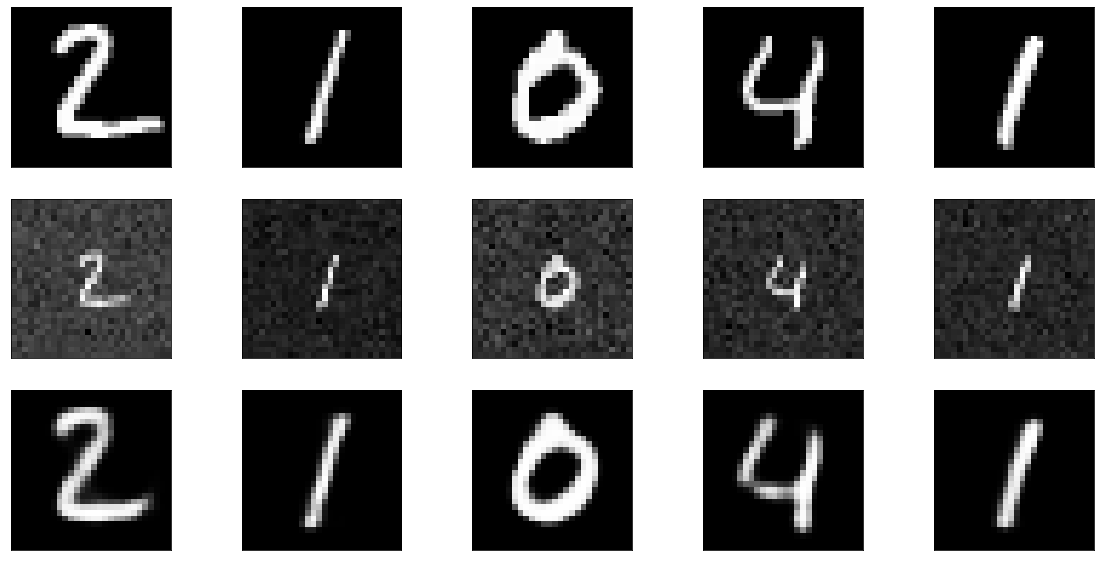

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder2.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

This different network ultimately resulted in pretty much the same loss value, but some different error artifacts (notice the corner of the '4')

###Part 3

Modified iradon functions from your github:

In [ ]:
from scipy.interpolate import interp1d
from scipy.constants import golden_ratio
from skimage.transform._warps import warp
from skimage.transform._radon_transform import sart_projection_update
from skimage._shared.fft import fftmodule
from skimage._shared.utils import  convert_to_float
from warnings import warn
from functools import partial
from skimage.transform import radon, rescale,  resize, warp
from scipy import interpolate
from skimage.transform import iradon_sart

if fftmodule is np.fft:
    # fallback from scipy.fft to scipy.fftpack instead of numpy.fft
    # (fftpack preserves single precision while numpy.fft does not)
    from scipy.fftpack import fft, ifft
else:
    fft = fftmodule.fft
    ifft = fftmodule.ifft
    
def iradon(radon_image, theta=None, output_size=None,
           filter_name="ramp", interpolation="linear", circle=True,
           preserve_range=True):
    """Inverse radon transform.

    Reconstruct an image from the radon transform, using the filtered
    back projection algorithm.

    Parameters
    ----------
    radon_image : array
        Image containing radon transform (sinogram). Each column of
        the image corresponds to a projection along a different
        angle. The tomography rotation axis should lie at the pixel
        index ``radon_image.shape[0] // 2`` along the 0th dimension of
        ``radon_image``.
    theta : array_like, optional
        Reconstruction angles (in degrees). Default: m angles evenly spaced
        between 0 and 180 (if the shape of `radon_image` is (N, M)).
    output_size : int, optional
        Number of rows and columns in the reconstruction.
    filter_name : str, optional
        Filter used in frequency domain filtering. Ramp filter used by default.
        Filters available: ramp, shepp-logan, cosine, hamming, hann.
        Assign None to use no filter.
    interpolation : str, optional
        Interpolation method used in reconstruction. Methods available:
        'linear', 'nearest', and 'cubic' ('cubic' is slow).
    circle : boolean, optional
        Assume the reconstructed image is zero outside the inscribed circle.
        Also changes the default output_size to match the behaviour of
        ``radon`` called with ``circle=True``.
    preserve_range : bool, optional
        Whether to keep the original range of values. Otherwise, the input
        image is converted according to the conventions of `img_as_float`.
        Also see https://scikit-image.org/docs/dev/user_guide/data_types.html

    Returns
    -------
    reconstructed : ndarray
        Reconstructed image. The rotation axis will be located in the pixel
        with indices
        ``(reconstructed.shape[0] // 2, reconstructed.shape[1] // 2)``.

    .. versionchanged :: 0.19
        In ``iradon``, ``filter`` argument is deprecated in favor of
        ``filter_name``.

    References
    ----------
    .. [1] AC Kak, M Slaney, "Principles of Computerized Tomographic
           Imaging", IEEE Press 1988.
    .. [2] B.R. Ramesh, N. Srinivasa, K. Rajgopal, "An Algorithm for Computing
           the Discrete Radon Transform With Some Applications", Proceedings of
           the Fourth IEEE Region 10 International Conference, TENCON '89, 1989

    Notes
    -----
    It applies the Fourier slice theorem to reconstruct an image by
    multiplying the frequency domain of the filter with the FFT of the
    projection data. This algorithm is called filtered back projection.

    """
    if radon_image.ndim != 2:
        raise ValueError('The input image must be 2-D')

    if theta is None:
        theta = np.linspace(0, 180, radon_image.shape[1], endpoint=False)

    angles_count = len(theta)
    if angles_count != radon_image.shape[1]:
        raise ValueError("The given ``theta`` does not match the number of "
                         "projections in ``radon_image``.")

    interpolation_types = ('linear', 'nearest', 'cubic')
    if interpolation not in interpolation_types:
        raise ValueError("Unknown interpolation: %s" % interpolation)

    filter_types = ('ramp', 'shepp-logan', 'cosine', 'hamming', 'hann', None)
    if filter_name not in filter_types:
        raise ValueError("Unknown filter: %s" % filter_name)

    radon_image = convert_to_float(radon_image, preserve_range)
    dtype = radon_image.dtype

    img_shape = radon_image.shape[0]
    if output_size is None:
        # If output size not specified, estimate from input radon image
        if circle:
            output_size = img_shape
        else:
            output_size = int(np.floor(np.sqrt((img_shape) ** 2 / 2.0)))

    if circle:
        radon_image = _sinogram_circle_to_square(radon_image)
        img_shape = radon_image.shape[0]

    # Resize image to next power of two (but no less than 64) for
    # Fourier analysis; speeds up Fourier and lessens artifacts
    projection_size_padded = max(64, int(2 ** np.ceil(np.log2(2 * img_shape))))
    pad_width = ((0, projection_size_padded - img_shape), (0, 0))
    img = np.pad(radon_image, pad_width, mode='constant', constant_values=0)

    # Apply filter in Fourier domain
    fourier_filter = _get_fourier_filter(projection_size_padded, filter_name)
    projection = fft(img, axis=0) * fourier_filter
    radon_filtered = np.real(ifft(projection, axis=0)[:img_shape, :])

    # Reconstruct image by interpolation
    reconstructed = np.zeros((output_size, output_size),
                             dtype=dtype)
    radius = output_size // 2
    xpr, ypr = np.mgrid[:output_size, :output_size] - radius
    x = np.arange(img_shape) - img_shape // 2

    for col, angle in zip(radon_filtered.T, np.deg2rad(theta)):
        t = ypr * np.cos(angle) - xpr * np.sin(angle)
        if interpolation == 'linear':
            interpolant = partial(np.interp, xp=x, fp=col, left=0, right=0)
        else:
            interpolant = interp1d(x, col, kind=interpolation,
                                   bounds_error=False, fill_value=0)
        reconstructed += interpolant(t)

    if circle:
        out_reconstruction_circle = (xpr ** 2 + ypr ** 2) > radius ** 2
        reconstructed[out_reconstruction_circle] = 0.

    return reconstructed * np.pi / (2 * angles_count), projection
def _sinogram_circle_to_square(sinogram):
    diagonal = int(np.ceil(np.sqrt(2) * sinogram.shape[0]))
    pad = diagonal - sinogram.shape[0]
    old_center = sinogram.shape[0] // 2
    new_center = diagonal // 2
    pad_before = new_center - old_center
    pad_width = ((pad_before, pad - pad_before), (0, 0))
    return np.pad(sinogram, pad_width, mode='constant', constant_values=0)
def _get_fourier_filter(size, filter_name):
    """Construct the Fourier filter.

    This computation lessens artifacts and removes a small bias as
    explained in [1], Chap 3. Equation 61.

    Parameters
    ----------
    size : int
        filter size. Must be even.
    filter_name : str
        Filter used in frequency domain filtering. Filters available:
        ramp, shepp-logan, cosine, hamming, hann. Assign None to use
        no filter.

    Returns
    -------
    fourier_filter: ndarray
        The computed Fourier filter.

    References
    ----------
    .. [1] AC Kak, M Slaney, "Principles of Computerized Tomographic
           Imaging", IEEE Press 1988.

    """
    n = np.concatenate((np.arange(1, size / 2 + 1, 2, dtype=int),
                        np.arange(size / 2 - 1, 0, -2, dtype=int)))
    f = np.zeros(size)
    f[0] = 0.25
    f[1::2] = -1 / (np.pi * n) ** 2

    # Computing the ramp filter from the fourier transform of its
    # frequency domain representation lessens artifacts and removes a
    # small bias as explained in [1], Chap 3. Equation 61
    fourier_filter = 2 * np.real(fft(f))         # ramp filter
    if filter_name == "ramp":
        pass
    elif filter_name == "shepp-logan":
        # Start from first element to avoid divide by zero
        omega = np.pi * fftmodule.fftfreq(size)[1:]
        fourier_filter[1:] *= np.sin(omega) / omega
    elif filter_name == "cosine":
        freq = np.linspace(0, np.pi, size, endpoint=False)
        cosine_filter = fftmodule.fftshift(np.sin(freq))
        fourier_filter *= cosine_filter
    elif filter_name == "hamming":
        fourier_filter *= fftmodule.fftshift(np.hamming(size))
    elif filter_name == "hann":
        fourier_filter *= fftmodule.fftshift(np.hanning(size))
    elif filter_name is None:
        fourier_filter[:] = 1

    return fourier_filter[:, np.newaxis]

Load Dataset (again I had to cut off the number of training data so that I wan't waiting all day). I decided to go even sparser, with just 10 random angle samples.

In [ ]:
# load the mnist dataset of characters
from keras.datasets import mnist

ntheta=10;
# randomly spaced values of theta
thetaVals=np.random.choice(360,ntheta,replace=False)/2.


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[0:20000]
y_train = y_train[0:20000]
x_test = x_test[0:20000]
y_test = y_test[0:20000]
#
# image padding to full radon data from all directions.
#
x_train =np.pad(x_train, ((0,0),(18,18),(18,18)), 'constant')
x_test =np.pad(x_test, ((0,0),(18,18),(18,18)), 'constant')

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))
for pop in range(np.shape(x_test)[0]):
  g_test[pop,:,:]= iradon_sart(radon(x_test[pop,:,:],thetaVals), theta=thetaVals)
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  g_train[pop,:,:]=iradon_sart(radon(x_train[pop,:,:],thetaVals), theta=thetaVals)
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 64, 64, 1))
x_test = np.reshape(x_test, (len(x_test), 64, 64, 1))
g_train = np.reshape(g_train, (len(g_train), 64, 64, 1))
g_test = np.reshape(g_test, (len(g_test), 64, 64, 1))

/usr/local/lib/python3.7/dist-packages/skimage/transform/radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])


Same network architecture

In [ ]:
inputs=keras.Input(shape=(64, 64, 1))

# Encoder
x = layers.Conv2D(32, (5, 5), strides=1, activation="relu", padding="same")(inputs)
x = layers.Conv2D(32, (4, 4), strides=2, activation="relu", padding="same")(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(8, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(1, (3, 3), activation="linear", padding="same")(x)

autoencoder = keras.Model(inputs, x)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 16)        4624  

In [ ]:

autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/10
157/157 [==============================] - 428s 3s/step - loss: 0.0083 - val_loss: 0.0037
Epoch 2/10
157/157 [==============================] - 424s 3s/step - loss: 0.0030 - val_loss: 0.0024
Epoch 3/10
157/157 [==============================] - 424s 3s/step - loss: 0.0023 - val_loss: 0.0021
Epoch 4/10
157/157 [==============================] - 433s 3s/step - loss: 0.0020 - val_loss: 0.0019
Epoch 5/10
157/157 [==============================] - 434s 3s/step - loss: 0.0018 - val_loss: 0.0018
Epoch 6/10
157/157 [==============================] - 434s 3s/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/10
157/157 [==============================] - 432s 3s/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/10
157/157 [==============================] - 463s 3s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/10
157/157 [==============================] - 463s 3s/step - loss: 0.0014 - val_loss: 0.0014
Epoch 10/10
157/157 [==============================] - 454s 3s/step - loss: 0.0014 - val_lo

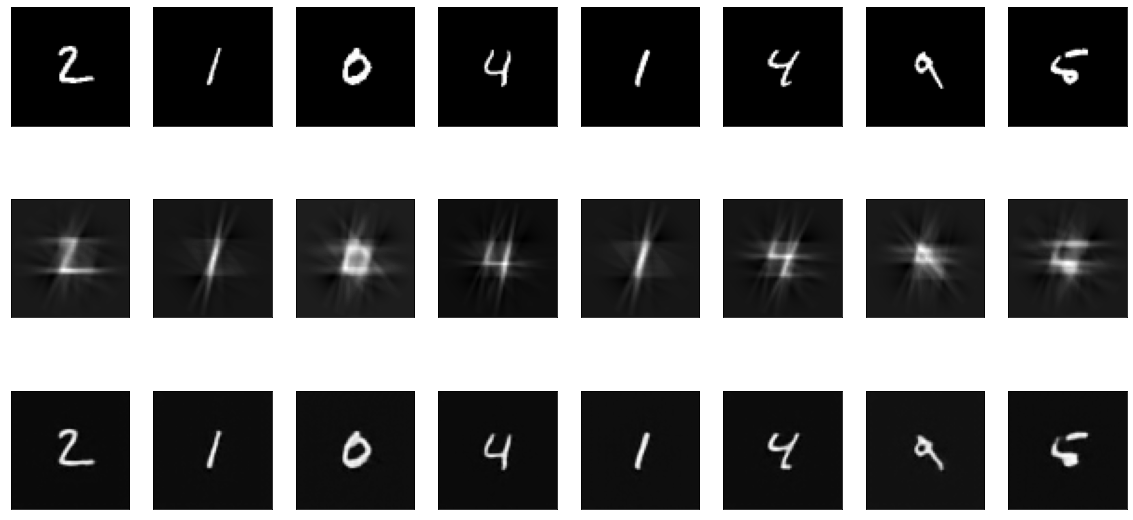

In [ ]:

n = 8
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(g_test[i:(i+1),:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Heyyy that actually looks pretty good! Even sparser sampling still works well.

###Part 4

In [11]:
import numpy as np
import imutils
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal
from scipy import integrate
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import cv2
from keras.datasets import mnist

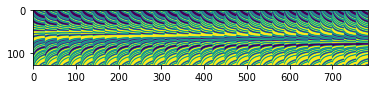

In [2]:
l= 10
delta=1
N=28
M=128
code=np.random.randint(0,2,M)
def t(x):
  t=code[np.int(np.floor((x+M/2)/delta))]
  return t
vt=np.vectorize(t)
def p(j):
  xj, yj=delta*divmod(j,N)
  xj=xj-N*delta/2
  yj=yj+l
  return xj, yj
def g(j,x):
  g=t((x+(l/p(j)[1])*p(j)[0])/(1+(l/p(j)[1])))
  return g
def h(i,j):
  h=integrate.quad(lambda x: g(j,x), (i-M/2)*delta-delta/2,(i-M/2)*delta +delta/2)[0]
  return h
H=np.zeros((M,N**2))
for j in range(N**2):
  for i in range(M):
    H[i,j]=h(i,j)
plt.imshow(H)

To accomplish the two directional coding, I decided the best method would be to train the network using the upright image and the rotated 90 deg image

(100, 56, 28)


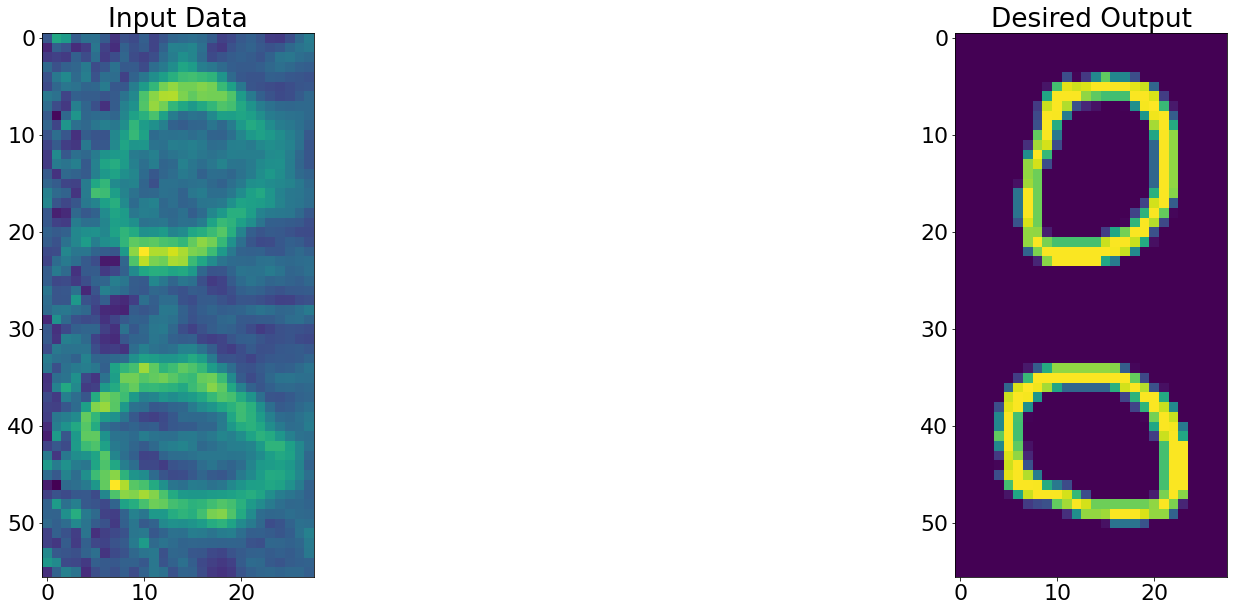

In [33]:
u, lam, vh = np.linalg.svd(H)
ph=np.linalg.pinv(H)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

x_train = x_train[0:100]
x_test = x_test[0:100]

angle = 90

g_test1=np.zeros(np.shape(x_test))
g_train1=np.zeros(np.shape(x_train))

g_test2=np.zeros(np.shape(x_test))
g_train2=np.zeros(np.shape(x_train))

g_test=np.zeros(np.shape(x_test)*np.array([1,2,1]))
g_train=np.zeros(np.shape(x_train)*np.array([1,2,1]))

x_testconcat = np.zeros(np.shape(x_test)*np.array([1,2,1]))
x_trainconcat = np.zeros(np.shape(x_train)*np.array([1,2,1]))

for pop in range(np.shape(x_test)[0]):
  g_test1[pop,:,:]= np.reshape(np.matmul(ph,np.matmul(H,np.reshape(x_test[pop],N**2))),(N,N))
  g_test1[pop,:,:]=g_test1[pop,:,:]/np.max(g_test1[pop,:,:])
  g_test2[pop,:,:]= np.reshape(np.matmul(ph,np.matmul(H,np.reshape(imutils.rotate(x_test[pop],angle=angle),N**2))),(N,N))
  g_test2[pop,:,:]=g_test2[pop,:,:]/np.max(g_test2[pop,:,:])

  g_test[pop,:,:] = cv2.vconcat([g_test1[pop,:,:],g_test2[pop,:,:]])

  x_testconcat[pop,:,:] = cv2.vconcat([x_test[pop],imutils.rotate(x_test[pop],angle=angle)])

plt.subplot(1,2,1)
plt.imshow(g_test[10,:,:])
plt.title('Input Data')
plt.subplot(1,2,2)

plt.imshow(x_testconcat[10,:,:])

plt.title('Desired Output')

for pop in range(np.shape(x_train)[0]):
  g_train1[pop,:,:]= np.reshape(np.matmul(ph,np.matmul(H,np.reshape(x_train[pop],N**2))),(N,N))
  g_train1[pop,:,:]=g_train1[pop,:,:]/np.max(g_train1[pop,:,:])
  g_train2[pop,:,:]= np.reshape(np.matmul(ph,np.matmul(H,np.reshape(imutils.rotate(x_train[pop],angle=90),N**2))),(N,N))
  g_train2[pop,:,:]=g_train2[pop,:,:]/np.max(g_train2[pop,:,:])

  g_train[pop,:,:] = cv2.vconcat([g_train1[pop,:,:],g_train2[pop,:,:]])

  x_trainconcat[pop,:,:] = cv2.vconcat([x_train[pop],imutils.rotate(x_train[pop],angle=90)])

print(np.shape(x_testconcat))

g_train = np.reshape(g_train, (len(g_train), 2*N, N, 1))
g_test = np.reshape(g_test, (len(g_test), 2*N, N, 1))